# CNN and LSTM

To apply CNN and LSTM on the given dataset


**CNN**
*   A Convolutional Neural Network (CNN) is a type of deep learning algorithm that is particularly well-suited for image recognition and processing tasks. It is made up of multiple layers, including convolutional layers, pooling layers, and fully connected layers.

* The convolutional layers are the key component of a CNN, where filters are applied to the input image to extract features such as edges, textures, and shapes. The output of the convolutional layers is then passed through pooling layers, which are used to down-sample the feature maps, reducing the spatial dimensions while retaining the most important information. The output of the pooling layers is then passed through one or more fully connected layers, which are used to make a prediction or classify the image

* **1D CNN** A convolution layer accepts a multichannel one dimensional signal, convolves it with each of its multichannel kernels, and stacks the results together into a new multichannel signal that it passes on to the next layer


 **LSTM**
* Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network (RNN) can process not only single data points (such as images), but also entire sequences of data (such as speech or video). This characteristic makes LSTM networks ideal for processing and predicting data. For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition, speech recognition,machine translation, speech activity detection, robot control, video games, and healthcare


In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

from keras import layers
from keras import losses

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

import pydot

In [ ]:
print(tf.__version__)
#policy = mixed_precision.Policy('mixed_float16')
#mixed_precision.set_policy(policy)

2.12.0


In [ ]:
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Please install GPU version of TF


preprocessing the dataset

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text):
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string



def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))])

    return text2.lower()



In [ ]:
# Let us pre-process the data
train_data= pd.read_csv("/content/drive/MyDrive/nlp/spacy_preprocessed_labeledtext.csv")
train_data


,Unnamed: 0,File Name,Caption,LABEL
0,0,1.txt,feel today legday jelly ache gym,negative
1,1,10.txt,absolute disgrace carriage Bangor half way sta...,negative
2,2,100.txt,Valentine 1 nephew elated little thing big goo...,positive
3,3,1000.txt,betterfeelingfilm RT Instagram day film powerl...,neutral
4,4,1001.txt,Zoe love rattle,positive
...,...,...,...,...
4864,4864,995.txt,OMG Eskom Man die LoadShedding powerless,positive
4865,4865,996.txt,Feelin love ValentinesDay care,positive
4866,4866,997.txt,blue eye beat,neutral
4867,4867,998.txt,LA CHUCHA LOUUU TE CHUPO LOS OJOS,neutral


In [ ]:
train_data.dropna(axis = 0, how ='any',inplace=True)
train_data['Num_words_text'] = train_data['Caption'].apply(lambda x:len(str(x).split()))
mask = train_data['Num_words_text'] >2
train_data = train_data[mask]
print('-------Train data--------')
print(train_data['LABEL'].value_counts())
print(len(train_data))
print('-------------------------')
max_train_sentence_length  = train_data['Num_words_text'].max()
test_data= pd.read_csv("/content/drive/MyDrive/nlp/spacy_preprocessed_labeledtext.csv")
test_data.dropna(axis = 0, how ='any',inplace=True)
test_data['Num_words_text'] = test_data['Caption'].apply(lambda x:len(str(x).split()))

print('Train Max Sentence Length :'+str(max_train_sentence_length))

-------Train data--------
positive    1620
neutral     1485
negative    1409
Name: LABEL, dtype: int64
4514
-------------------------
Train Max Sentence Length :23


<ipython-input-16-a22b935de430>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(axis = 0, how ='any',inplace=True)
<ipython-input-16-a22b935de430>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Num_words_text'] = train_data['Caption'].apply(lambda x:len(str(x).split()))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

print('Train Max Sentence Length :'+str(max_train_sentence_length))


Train Max Sentence Length :23


In [ ]:
num_words = 20000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(train_data['Caption'].tolist())


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))




[[1, 1, 1, 1156]]


Spliting the dataset

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['Caption'].tolist(),\
                                                      train_data['LABEL'].tolist(),\
                                                      test_size=0.1,\
                                                      stratify = train_data['LABEL'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))


x_train = np.array( tokenizer.texts_to_sequences(X_train),dtype=object )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid),dtype=object )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['Caption'].tolist()),dtype=object )



x_train = pad_sequences(x_train, padding='post', maxlen=23)
x_valid = pad_sequences(x_valid, padding='post', maxlen=23)
x_test = pad_sequences(x_test, padding='post', maxlen=23)

print(x_train[0])

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
#print(train_labels)
valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

test_labels = le.transform(test_data['LABEL'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)
train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:4062
Class distributionCounter({'positive': 1458, 'neutral': 1336, 'negative': 1268})
Valid data len:452
Class distributionCounter({'positive': 162, 'neutral': 149, 'negative': 141})
[ 959 3056 1126 2098 3057    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


In [ ]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

['negative', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'neutral', 'neutral', 'neutral']
Text to number
[0 2 2 1 1 2 2 1 1 1]
Number to category
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==3:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==3:
        break
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==3:
        break

Streaming output truncated to the last 5000 lines.
    0    0    0    0    0    0    0    0    0], shape=(23,), dtype=int32) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(
[   2  884 9175  201   76 2517 9176   37 9177    0    0    0    0    0
    0    0    0    0    0    0    0    0    0], shape=(23,), dtype=int32) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor([ 2 24 37 75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0], shape=(23,), dtype=int32) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(
[1211 9178  359 2507  436    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0], shape=(23,), dtype=int32) tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
tf.Tensor(
[   2 9179 9180  235  499 9181 2442  147 1261 2999 9182  186 1625   33
    0    0    0    0    0    0    0    0    0], shape=(23,), dtype=int32) tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
tf.Tensor(
[   2   37 9183  558 1217   62  827 2178  2

# CNN model

In [ ]:
max_features =20000
embedding_dim =64
sequence_length = 23
import keras.layers as L
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))

model.add(tf.keras.layers.Conv1D(128,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005)))


model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(3, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))




model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 23, 64)            1280064   
                                                                 
 conv1d_7 (Conv1D)           (None, 21, 128)           24704     
                                                                 
 global_max_pooling1d_7 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,305,155
Trainable params: 1,305,155
Non-trainable params: 0
___________________________________________

# LSTM Model

In [ ]:
#LSTM
from keras.layers import Dense, LSTM, Embedding
max_features =20000
embedding_dim =64
sequence_length =23

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))

model2.add(LSTM(10))


model2.add(tf.keras.layers.Dense(3, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))




model2.summary()
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 23, 64)            1280064   
                                                                 
 lstm_3 (LSTM)               (None, 10)                3000      
                                                                 
 dense_11 (Dense)            (None, 3)                 33        
                                                                 
Total params: 1,283,097
Trainable params: 1,283,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training CNN Model
epochs = 20
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
#history = model.fit(x_train,train_labels,epochs=50)
history = model.fit(train_ds.shuffle(2000).batch(128),epochs= epochs ,validation_data=valid_ds.batch(128),verbose=1)

Epoch 1/20
32/32 [==============================] - 2s 57ms/step - loss: 0.2271 - categorical_accuracy: 0.9956 - val_loss: 1.1063 - val_categorical_accuracy: 0.6814
Epoch 2/20
32/32 [==============================] - 1s 35ms/step - loss: 0.2218 - categorical_accuracy: 0.9956 - val_loss: 1.1155 - val_categorical_accuracy: 0.6925
Epoch 3/20
32/32 [==============================] - 1s 32ms/step - loss: 0.2132 - categorical_accuracy: 0.9975 - val_loss: 1.1185 - val_categorical_accuracy: 0.6836
Epoch 4/20
32/32 [==============================] - 2s 52ms/step - loss: 0.2103 - categorical_accuracy: 0.9958 - val_loss: 1.1375 - val_categorical_accuracy: 0.6748
Epoch 5/20
32/32 [==============================] - 2s 69ms/step - loss: 0.2055 - categorical_accuracy: 0.9975 - val_loss: 1.1503 - val_categorical_accuracy: 0.6792
Epoch 6/20
32/32 [==============================] - 1s 35ms/step - loss: 0.2020 - categorical_accuracy: 0.9983 - val_loss: 1.1419 - val_categorical_accuracy: 0.6814
Epoch 7/20

In [ ]:
history.history

{'loss': [0.22706952691078186,
  0.22182150185108185,
  0.21322223544120789,
  0.2103157490491867,
  0.20548294484615326,
  0.20204755663871765,
  0.19953517615795135,
  0.1957959234714508,
  0.19370217621326447,
  0.19339178502559662,
  0.1942085176706314,
  0.18962767720222473,
  0.18927112221717834,
  0.18897679448127747,
  0.18766817450523376,
  0.18571428954601288,
  0.18421787023544312,
  0.18398578464984894,
  0.1836094856262207,
  0.18251313269138336],
 'categorical_accuracy': [0.9955686926841736,
  0.9955686926841736,
  0.997538149356842,
  0.995814859867096,
  0.997538149356842,
  0.9982767105102539,
  0.9967995882034302,
  0.9985228776931763,
  0.9985228776931763,
  0.9972919821739197,
  0.9963072538375854,
  0.9987691044807434,
  0.9977843165397644,
  0.9985228776931763,
  0.9980305433273315,
  0.9992614388465881,
  0.9990152716636658,
  0.9990152716636658,
  0.9995076060295105,
  0.9990152716636658],
 'val_loss': [1.1062686443328857,
  1.1155104637145996,
  1.1185089349746

In [ ]:
history2 = model2.fit(train_ds.shuffle(2000).batch(128),epochs= epochs ,validation_data=valid_ds.batch(128),verbose=1)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 [==============================] - 7s 52ms/step - loss: 1.3706 - categorical_accuracy: 0.3587 - val_loss: 1.1751 - val_categorical_accuracy: 0.3584
Epoch 2/20
32/32 [==============================] - 1s 34ms/step - loss: 1.1262 - categorical_accuracy: 0.3592 - val_loss: 1.1033 - val_categorical_accuracy: 0.3584
Epoch 3/20
32/32 [==============================] - 1s 36ms/step - loss: 1.1019 - categorical_accuracy: 0.3631 - val_loss: 1.1004 - val_categorical_accuracy: 0.3584
Epoch 4/20
32/32 [==============================] - 1s 35ms/step - loss: 1.0988 - categorical_accuracy: 0.3808 - val_loss: 1.0919 - val_categorical_accuracy: 0.4447
Epoch 5/20
32/32 [==============================] - 1s 34ms/step - loss: 0.9904 - categorical_accuracy: 0.5308 - val_loss: 0.9442 - val_categorical_accuracy: 0.5487
Epoch 6/20
32/32 [==============================] - 1s 35ms/step - loss: 0.7494 - categorical_accuracy: 0.6489 - val_loss: 0.9668 - val_categorical_accuracy: 0.5111
Epoch 7/20
32/32 [===

In [ ]:
history2.history

{'loss': [1.3705825805664062,
  1.1262009143829346,
  1.1019320487976074,
  1.0987615585327148,
  0.9903809428215027,
  0.7494100332260132,
  0.6575804948806763,
  0.6064107418060303,
  0.5313167572021484,
  0.44531846046447754,
  0.31498005986213684,
  0.21894501149654388,
  0.1774556189775467,
  0.1531788557767868,
  0.13898447155952454,
  0.13308171927928925,
  0.13783356547355652,
  0.1427411586046219,
  0.14111749827861786,
  0.13267368078231812],
 'categorical_accuracy': [0.3586902916431427,
  0.3591826558113098,
  0.3631216287612915,
  0.38084688782691956,
  0.5307730436325073,
  0.6489413976669312,
  0.6814377307891846,
  0.7338749170303345,
  0.7880354523658752,
  0.8564746379852295,
  0.9295913577079773,
  0.9640570878982544,
  0.9751353859901428,
  0.9822747707366943,
  0.9844903945922852,
  0.9849827885627747,
  0.9798129200935364,
  0.9793205261230469,
  0.9803052544593811,
  0.9844903945922852],
 'val_loss': [1.175078272819519,
  1.1033151149749756,
  1.1003820896148682,


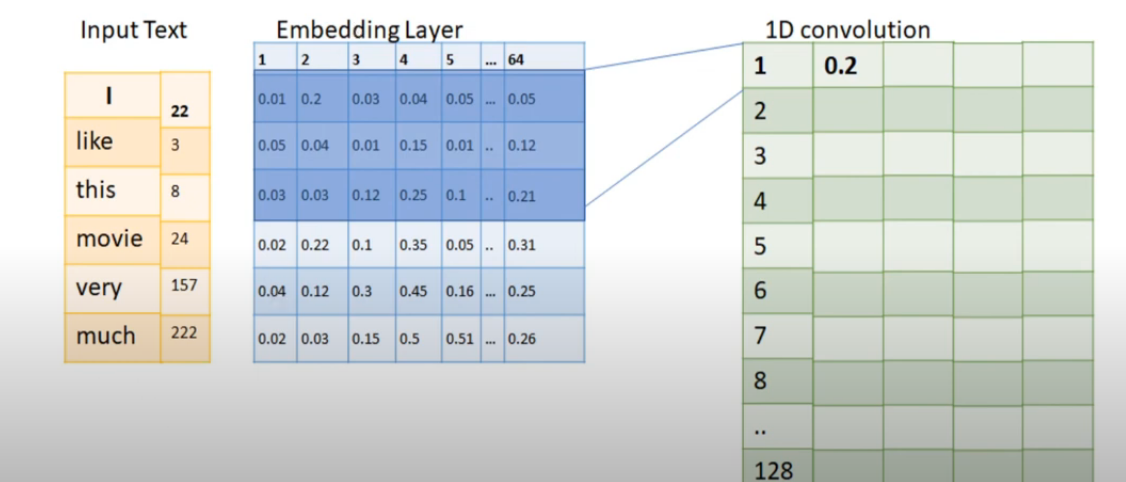

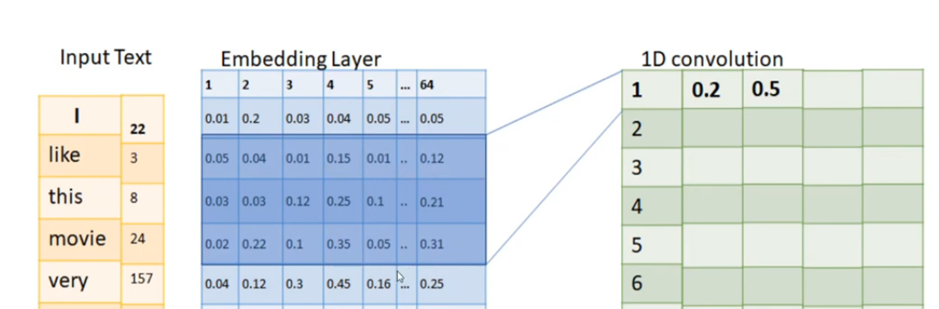

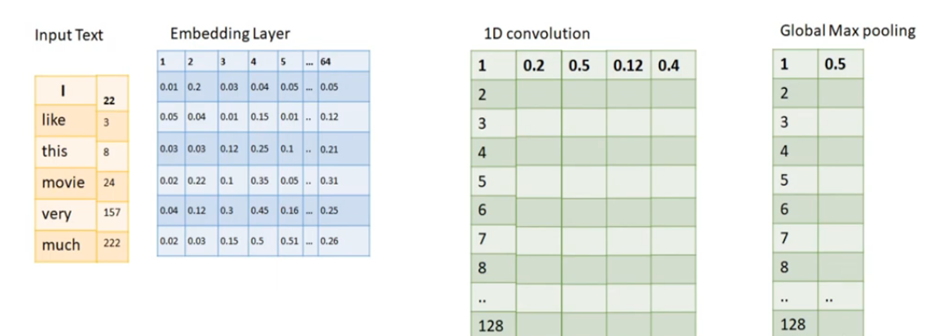

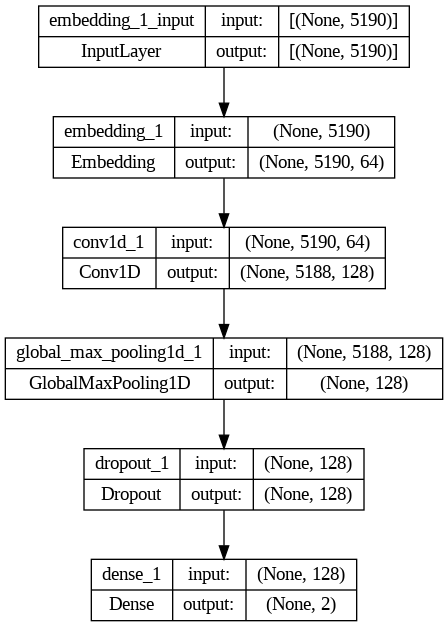

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

Let's train our model

In [ ]:
epochs = 10
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(128),
                   epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


70/70 [==============================] - 233s 3s/step - loss: 0.6700 - categorical_accuracy: 0.8602 - val_loss: 0.1402 - val_categorical_accuracy: 0.9970
Epoch 2/10
70/70 [==============================] - 229s 3s/step - loss: 0.0896 - categorical_accuracy: 0.9975 - val_loss: 0.0621 - val_categorical_accuracy: 0.9980
Epoch 3/10
70/70 [==============================] - 229s 3s/step - loss: 0.0543 - categorical_accuracy: 0.9988 - val_loss: 0.0463 - val_categorical_accuracy: 0.9980
Epoch 4/10
70/70 [==============================] - 241s 3s/step - loss: 0.0427 - categorical_accuracy: 0.9988 - val_loss: 0.0384 - val_categorical_accuracy: 0.9980
Epoch 5/10
70/70 [==============================] - 230s 3s/step - loss: 0.0364 - categorical_accuracy: 0.9983 - val_loss: 0.0342 - val_categorical_accuracy: 0.9980
Epoch 6/10
70/70 [==============================] - 229s 3s/step - loss: 0.0332 - categorical_accuracy: 0.9988 - val_loss: 0.0317 - val_categorical_accuracy: 0.9970
Epoch 7/10
70/70 [===

In [ ]:
history.history


{'loss': [0.6699768900871277,
  0.0895719900727272,
  0.0542936809360981,
  0.04273892939090729,
  0.03637451305985451,
  0.033180661499500275,
  0.030230319127440453,
  0.027822190895676613,
  0.026249993592500687,
  0.025501567870378494],
 'categorical_accuracy': [0.8601571321487427,
  0.9975308775901794,
  0.9987654089927673,
  0.9987654089927673,
  0.9983165264129639,
  0.9987654089927673,
  0.9987654089927673,
  0.9988776445388794,
  0.9989898800849915,
  0.9988776445388794],
 'val_loss': [0.140202134847641,
  0.06210369989275932,
  0.046250369399785995,
  0.03843966871500015,
  0.03423108905553818,
  0.03168990835547447,
  0.029478205367922783,
  0.028339015319943428,
  0.027569571509957314,
  0.02732066437602043],
 'val_categorical_accuracy': [0.9969696998596191,
  0.9979798197746277,
  0.9979798197746277,
  0.9979798197746277,
  0.9979798197746277,
  0.9969696998596191,
  0.9969696998596191,
  0.9969696998596191,
  0.9959595799446106,
  0.9969696998596191]}

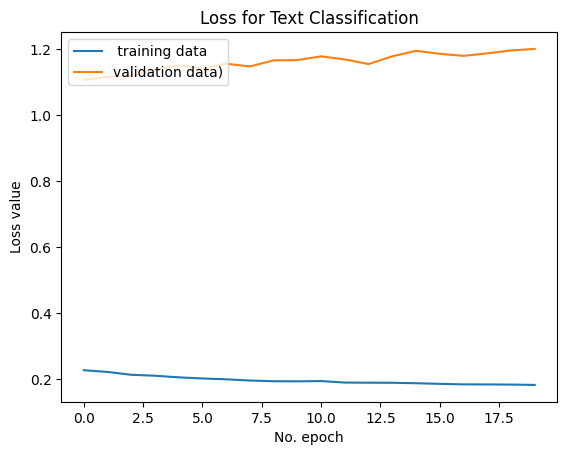

In [ ]:

plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data)')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


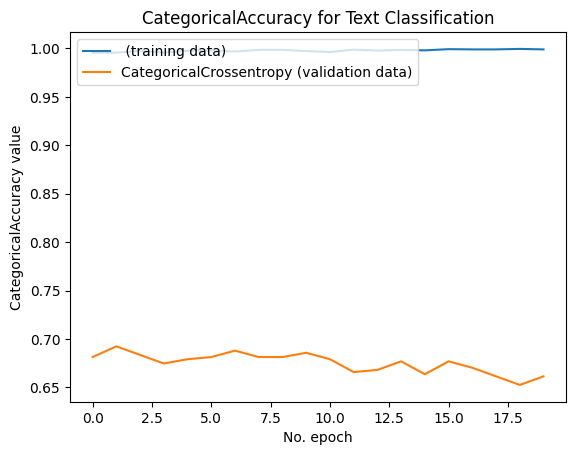

In [ ]:

plt.plot(history.history['categorical_accuracy'], label=' (training data)')
plt.plot(history.history['val_categorical_accuracy'], label='CategoricalCrossentropy (validation data)')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


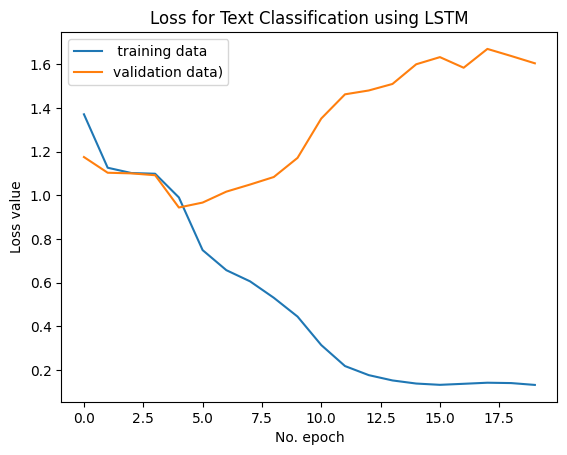

In [ ]:

plt.plot(history2.history['loss'], label=' training data')
plt.plot(history2.history['val_loss'], label='validation data)')
plt.title('Loss for Text Classification using LSTM')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
history_dict = history2.history
print(history_dict.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


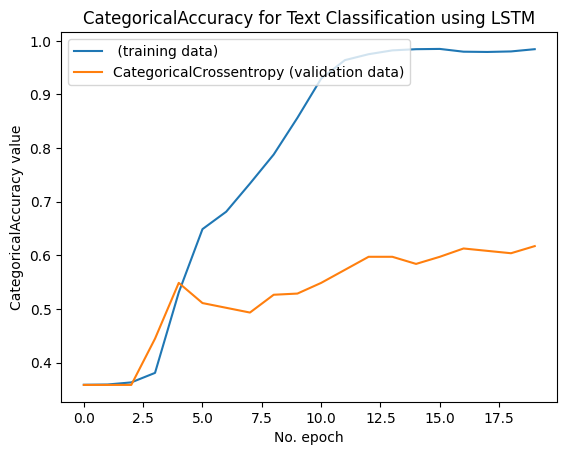

In [ ]:

plt.plot(history2.history['categorical_accuracy'], label=' (training data)')
plt.plot(history2.history['val_categorical_accuracy'], label='CategoricalCrossentropy (validation data)')
plt.title('CategoricalAccuracy for Text Classification using LSTM')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


**Observations**:


*   CNN and LSTM both gave good accuracy.
*   CNN gave less validation loss and with increase in epoch , the loss has slight changes.
*   LSTM increase in validation loss and decrease in training loss.
*   LSTM has increase in accuracy with increase in epochs.
* for LSTM, using earlystopping would be better.

